In [4]:
import pandas as pd 
import rasterio
import matplotlib.pyplot as plt
from lxml import etree

Image Shape: (13482, 22084)
CRS: None
Data Type: complex64


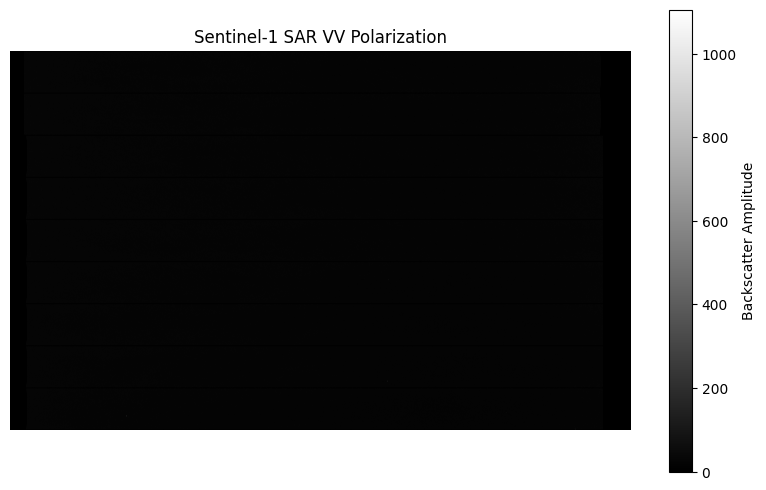

In [5]:
tiff_path = '/Users/hritik/Documents/Project /Wave Prediction/S1A_IW_SLC__1SDV_20231220T183612_20231220T183640_051742_063FCF_68FD.SAFE/measurement/s1a-iw1-slc-vh-20231220t183614-20231220t183639-051742-063fcf-001.tiff'
with rasterio.open(tiff_path) as src:
    sar_image = src.read(1)  # First band
    profile = src.profile

print("Image Shape:", sar_image.shape)
print("CRS:", profile['crs'])
print("Data Type:", sar_image.dtype)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(abs(sar_image), cmap='gray')
plt.title("Sentinel-1 SAR VV Polarization")
plt.colorbar(label="Backscatter Amplitude")
plt.axis('off')
plt.show()

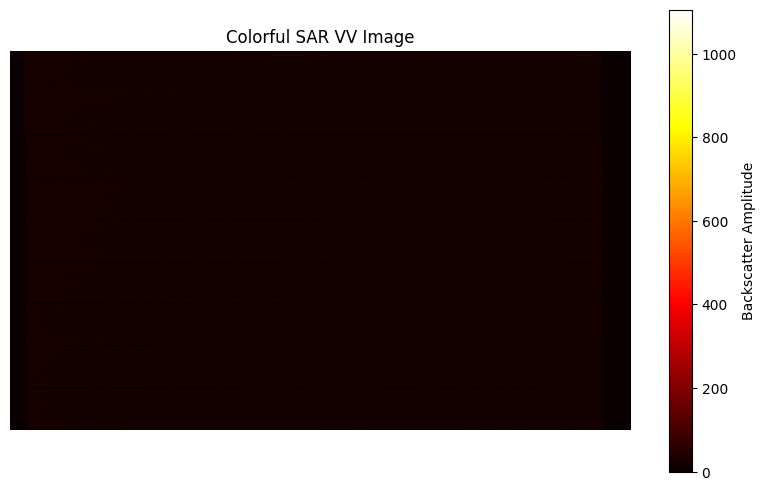

In [6]:
with rasterio.open(tiff_path) as src:
    image = src.read(1)

# Apply absolute value for complex data
image_abs = abs(image)

plt.figure(figsize=(10, 6))
plt.imshow(image_abs, cmap='hot')  # Try 'plasma', 'viridis', 'hot', 'inferno', etc.
plt.title("Colorful SAR VV Image")
plt.colorbar(label="Backscatter Amplitude")
plt.axis('off')
plt.show()

In [7]:
# === STEP 2: PARSE ANNOTATION XML ===

xml_path = '/Users/hritik/Documents/Project /Wave Prediction/S1A_IW_SLC__1SDV_20231220T183612_20231220T183640_051742_063FCF_68FD.SAFE/annotation/s1a-iw1-slc-vh-20231220t183614-20231220t183639-051742-063fcf-001.xml'
tree = etree.parse(xml_path)

# Example: Extract acquisition start and stop time
start_time = tree.findtext('.//imageAnnotation/imageInformation/productFirstLineUtcTime')
end_time = tree.findtext('.//imageAnnotation/imageInformation/productLastLineUtcTime')

print("\n🕒 Acquisition Time:")
print("Start:", start_time)
print("End  :", end_time)

# Example: Extract radar frequency
radar_frequency = tree.findtext('.//generalAnnotation/productInformation/radarFrequency')
print("\n📡 Radar Frequency:", radar_frequency, "Hz")


🕒 Acquisition Time:
Start: 2023-12-20T18:36:14.734694
End  : 2023-12-20T18:36:39.878258

📡 Radar Frequency: 5.405000454334350e+09 Hz


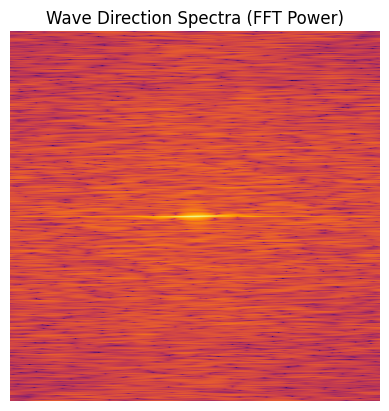

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("/Users/hritik/Documents/Project /Wave Prediction/S1A_IW_SLC__1SDV_20231220T183612_20231220T183640_051742_063FCF_68FD.SAFE/measurement/s1a-iw1-slc-vh-20231220t183614-20231220t183639-051742-063fcf-001.tiff") as src:
    data = src.read(1)  # SLC: Complex values (float32 with real/imag split)

# If the data is complex (check your source), calculate intensity
# If already magnitude, use abs(data)
intensity = np.abs(data)**2

# Crop a small region (e.g., 512x512) to apply FFT
patch = intensity[0:512, 0:512]
fft_img = np.fft.fftshift(np.fft.fft2(patch))
fft_power = np.abs(fft_img)**2

plt.imshow(np.log(fft_power + 1), cmap="inferno")
plt.title("Wave Direction Spectra (FFT Power)")
plt.axis('off')
plt.show()

🎯 Final Suggestion Based on Your Project

Since you’re working on a QML model for wave prediction, I recommend:

1.	Use Sentinel-1 SLC for image-based feature generation (FFT, texture)

2.	Combine it with ERA5 wind/wave ground truth for training

3.	(Optional) Apply calibration using XML files to get physical values

In [9]:
# apply blue filter 
def apply_blue_filter(image):
    """Apply a blue filter to the image."""
    # Create a blue filter
    blue_filter = np.array([0, 0, 255], dtype=np.uint8)
    
    # Convert the image to RGB if it's not already
    if len(image.shape) == 2:  # Grayscale image
        image_rgb = np.stack((image, image, image), axis=-1)
    else:
        image_rgb = image.copy()
    
    # Apply the blue filter
    filtered_image = image_rgb * (blue_filter / 255.0)
    
    return filtered_image

In [10]:
print(apply_blue_filter(image_abs))

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [11]:
# red filter

In [2]:
pip install copernicusmarine

  Obtaining dependency information for copernicusmarine from https://files.pythonhosted.org/packages/29/f1/e7b25cc2afcd1bce73dc3134d70de9fb6d9df1a8183a57b13ca37468a84e/copernicusmarine-2.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for arcosparse<0.5.0,>=0.4.0 from https://files.pythonhosted.org/packages/67/10/0c7a225804a0d94f705aecb303d96ba7f4adfd0cfe6062b2d2c6282a77b1/arcosparse-0.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for boto3>=1.26 from https://files.pythonhosted.org/packages/67/a9/13160d0e6b44c7fa9d6805a8cc83303af32455140b1b7decd8ff23fbbfee/boto3-1.38.42-py3-none-any.whl.metadata
  Obtaining dependency information for dask>=2022 from https://files.pythonhosted.org/packages/38/30/53b0844a7a4c6b041b111b24ca15cc9b8661a86fe1f6aaeb2d0d7f0fb1f2/dask-2025.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for h5netcdf<2.0.0,>=1.4.0 from https://files.pythonhosted.org/packages/b2/fc/e73747f3dd31906bfbb78c76069f67d91525fefa28492a

In [5]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
  dataset_version="202411",
  variables=["VMDR"],
  minimum_longitude=-10.102329,
  maximum_longitude=-10.102329,
  minimum_latitude=39.979985,
  maximum_latitude=39.979985,
  start_datetime="2025-05-25T12:00:00",
  end_datetime="2025-06-25T12:00:00",
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=1,
  disable_progress_bar=True,
)

INFO - 2025-06-24T09:25:02Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine username:Copernicus Marine password:

INFO - 2025-06-24T09:26:25Z - Selected dataset version: "202411"
INFO - 2025-06-24T09:26:25Z - Selected dataset part: "default"
INFO - 2025-06-24T09:26:35Z - Starting download. Please wait...
INFO - 2025-06-24T09:26:35Z - NetCDF compression enabled with level 1
INFO - 2025-06-24T09:26:37Z - Successfully downloaded to cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc', file_size=0.013475190839694656, data_transfer_size=4.627541984732824, variables=['VMDR'], coordinates_extent=[GeographicalExtent(minimum=-10.083333333333343, maximum=-10.083333333333343, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=40.0, maximum=40.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-05-25T12:00:00+00:00', maximum='2025-06-25T12:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [31]:
from netCDF4 import Dataset

# Open the .nc file
ds = Dataset("cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc")

# View metadata
print(ds)

# List all variables
print(ds.variables.keys())

# Access a variable
# vm_direction = ds.variables['VMDR'][:]
# print(vm_direction)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    references: http://marine.copernicus.eu
    contact: servicedesk.cmems@mercator-ocean.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    producer: CMEMS - Global Monitoring and Forecasting Centre
    institution: METEO-FRANCE
    copernicusmarine_version: 2.1.2
    dimensions(sizes): time(249), latitude(1), longitude(1)
    variables(dimensions): int16 VMDR(time, latitude, longitude), float64 latitude(latitude), float64 longitude(longitude), int32 time(time)
    groups: 
dict_keys(['VMDR', 'latitude', 'longitude', 'time'])


In [53]:
ds.info() # Get detailed information about the dataset

AttributeError: NetCDF: Attribute not found

In [34]:
import numpy as np
from datetime import datetime, timedelta

# Extract values
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time'][:]        # Usually in hours since a reference
vmdr = ds.variables['VMDR'][:]        # Shape: (time, lat, lon)

In [50]:
print(vmdr.shape)

(249, 1, 1)


In [51]:
print(vmdr)

[[[333.14999658]]

 [[327.98999669]]

 [[326.85999672]]

 [[324.72999677]]

 [[323.94999678]]

 [[325.07999676]]

 [[327.94999669]]

 [[331.66999661]]

 [[334.75999654]]

 [[337.69999648]]

 [[339.93999643]]

 [[340.8499964 ]]

 [[342.29999637]]

 [[342.20999637]]

 [[340.03999642]]

 [[338.09999647]]

 [[336.7999965 ]]

 [[335.55999652]]

 [[334.25999655]]

 [[333.39999657]]

 [[333.53999657]]

 [[334.25999655]]

 [[334.10999656]]

 [[333.77999656]]

 [[333.50999657]]

 [[331.9199966 ]]

 [[329.55999666]]

 [[327.6499967 ]]

 [[326.26999673]]

 [[324.96999676]]

 [[323.2399968 ]]

 [[321.27999684]]

 [[319.59999688]]

 [[319.17999689]]

 [[318.24999691]]

 [[319.30999689]]

 [[320.21999687]]

 [[320.30999686]]

 [[320.07999687]]

 [[320.38999686]]

 [[320.43999686]]

 [[321.00999685]]

 [[323.0199968 ]]

 [[324.13999678]]

 [[326.41999673]]

 [[326.71999672]]

 [[326.70999672]]

 [[325.62999674]]

 [[322.9699968 ]]

 [[322.13999682]]

 [[323.2999968 ]]

 [[326.68999672]]

 [[331.23999

In [39]:
print(time)

[cftime.DatetimeGregorian(2025, 5, 25, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 18, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 21, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 3, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 6, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 9, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 18, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 21, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 27, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 27, 3, 0, 0, 0, has_y

In [41]:
import pandas as pd

# Convert cftime objects to regular Python datetime
time_converted = [t.datetime for t in time]  # Convert each to datetime.datetime

# Create a DataFrame
df = pd.DataFrame({
    "time": time_converted,
    "VMDR": vmdr_flat
})

print(df.head())

AttributeError: 'cftime._cftime.DatetimeGregorian' object has no attribute 'datetime'

In [40]:
# Read time units (e.g., 'hours since 1900-01-01 00:00:00.0')
time_units = ds.variables['time'].units
time_calendar = ds.variables['time'].calendar if 'calendar' in ds.variables['time'].ncattrs() else 'standard'

from netCDF4 import num2date
time = num2date(time, units=time_units, calendar=time_calendar)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'cftime._cftime.DatetimeGregorian'

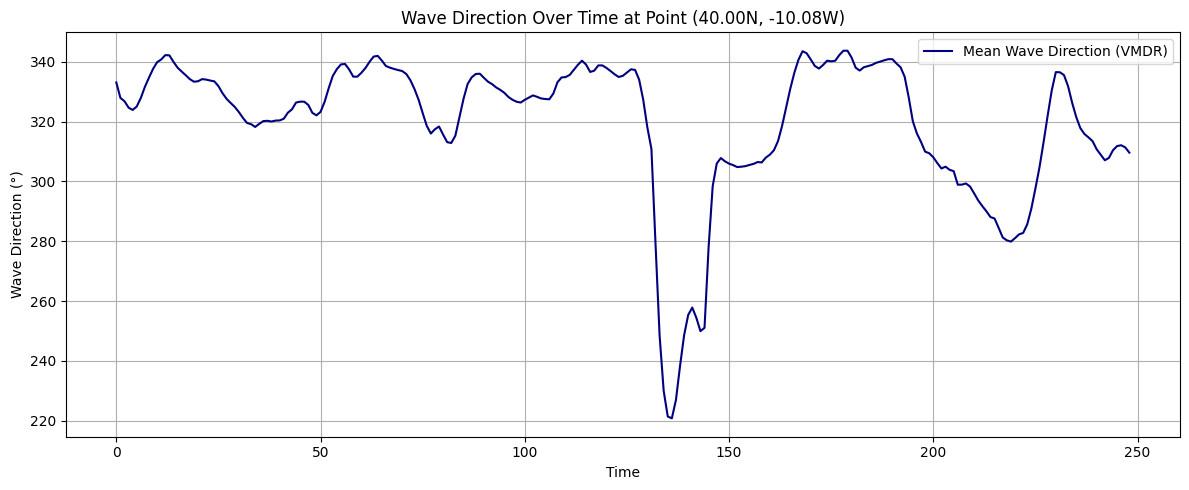

In [47]:
import matplotlib.pyplot as plt

# Flatten VMDR if needed
vmdr_flat = vmdr[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vmdr_flat, label="Mean Wave Direction (VMDR)", color='navy')
plt.xlabel('Time')
plt.ylabel('Wave Direction (°)')
plt.title('Wave Direction Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
  dataset_version="202411",
  variables=["VMDR"],
  minimum_longitude=-11.084738,
  maximum_longitude=-9.269973,
  minimum_latitude=37.971742,
  maximum_latitude=40.205483,
  start_datetime="2025-04-25T00:00:00",
  end_datetime="2025-06-25T12:00:00",
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=1,
  disable_progress_bar=True,
)

INFO - 2025-06-24T14:41:41Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-06-24T14:42:02Z - Selected dataset version: "202411"
INFO - 2025-06-24T14:42:02Z - Selected dataset part: "default"
INFO - 2025-06-24T14:42:08Z - Starting download. Please wait...
INFO - 2025-06-24T14:42:08Z - NetCDF compression enabled with level 1
INFO - 2025-06-24T14:42:14Z - Successfully downloaded to cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc', file_size=0.5718587786259542, data_transfer_size=27.765251908396948, variables=['VMDR'], coordinates_extent=[GeographicalExtent(minimum=-11.083333333333343, maximum=-9.333333333333343, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=38.0, maximum=40.16666666666666, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-04-25T00:00:00+00:00', maximum='2025-06-25T12:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [58]:
from netCDF4 import Dataset

# Open the .nc file
ds1 = Dataset("/Users/hritik/Documents/Project /Wave Prediction/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc")

# View metadata
print(ds1)

# List all variables
print(ds1.variables.keys())

# Access a variable
vm_direction1 = ds1.variables['VMDR'][:]
print(vm_direction1)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    references: http://marine.copernicus.eu
    contact: servicedesk.cmems@mercator-ocean.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    producer: CMEMS - Global Monitoring and Forecasting Centre
    institution: METEO-FRANCE
    copernicusmarine_version: 2.1.2
    dimensions(sizes): time(493), latitude(27), longitude(22)
    variables(dimensions): int16 VMDR(time, latitude, longitude), float64 latitude(latitude), float64 longitude(longitude), int32 time(time)
    groups: 
dict_keys(['VMDR', 'latitude', 'longitude', 'time'])
[[[312.88999702967703 313.15999702364206 313.26999702118337 ...
   312.25999704375863 310.92999707348645 308.8999971188605]
  [312.17999704554677 312.47999703884125 312.65999703481793 ...
   311.60999705828726 310.2599970884621 307.729997145012]
  [311.43999706208706 311.77999705448747 311.9999970495701 ...
   310.8499970752746 309.30999710969

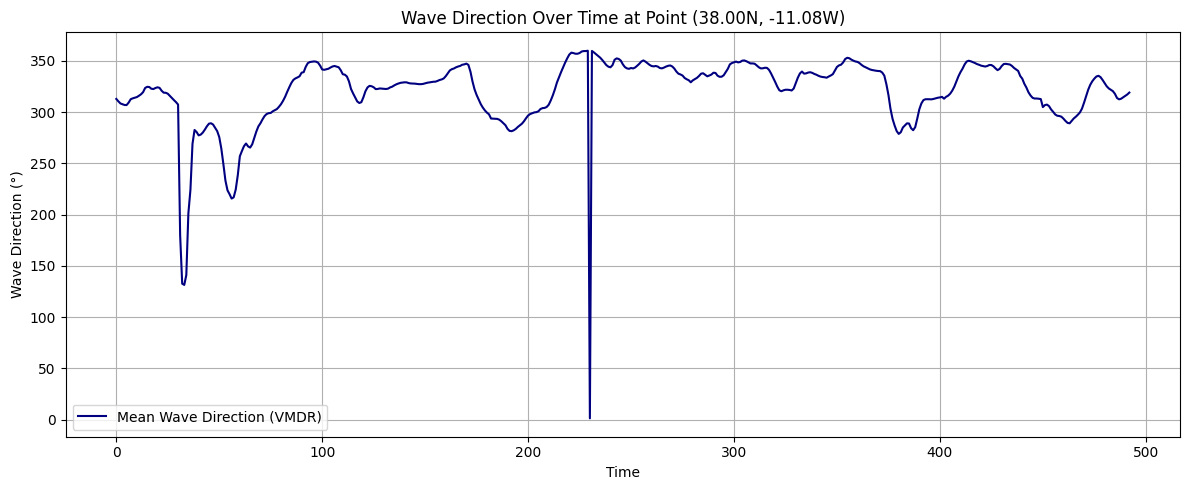

In [59]:
lat = ds1.variables['latitude'][:]
lon = ds1.variables['longitude'][:]
time = ds1.variables['time'][:]        # Usually in hours since a reference
vmdr1 = ds1.variables['VMDR'][:]  

vmdr_flat = vmdr1[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vmdr_flat, label="Mean Wave Direction (VMDR)", color='navy')
plt.xlabel('Time')
plt.ylabel('Wave Direction (°)')
plt.title('Wave Direction Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
import arrow
import requests

start = arrow.get('2018-05-15')

response = requests.get(
  'https://api.stormglass.io/v1/tide/extremes/point',
  params={
    'lat': 60.936,
    'lng': 5.114,
    'start': start.to('UTC').timestamp(),  # Convert to UTC timestamp
    'end': start.shift(days=1).to('UTC').timestamp()
  },
  headers={
    'Authorization': 'example-api-key'
  }
)

# Do something with response data.
json_data = response.json()

ModuleNotFoundError: No module named 'arrow'